# Project 1: SAT Participation Rates

In [137]:
#libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW
import sympy as sy

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data


In [138]:
file_path = '../data/act_2017.csv'

In [139]:
df_act_2017 = pd.read_csv(file_path)

In [140]:
file_path_2 = '../data/sat_2017.csv'

In [141]:
df_sat_2017 = pd.read_csv(file_path_2)

#### 2. Preview and inspect the data


In [142]:
df_act_2017.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [143]:
df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [144]:
df_act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [145]:
df_sat_2017.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [146]:
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [147]:
df_sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### 3. Look for errors in the data


In [148]:
#pulled max value of each column in SAT data
for x in df_sat_2017.columns:
    print(x, '-', df_sat_2017[x].max())

State - Wyoming
Participation - 96%
Evidence-Based Reading and Writing - 644
Math - 651
Total - 1295


In [149]:
#pulled min value of each column in SAT data
for x in df_sat_2017.columns:
    print(x, '-', df_sat_2017[x].min())

State - Alabama
Participation - 10%
Evidence-Based Reading and Writing - 482
Math - 52
Total - 950


**Findings**

SAT - comparing the above outputs against the web source (from the link), an issue that stands out is the difference in the maximum and minimum participation rates. Our data has a max participation rate of 96% with a min participation rate of 10%, while the web source shows multiple states with a participation rate higher than 96% and lower than 10%. At a high level it looks like the CSV file aligns with the web source, so there may have been a conversion issue in the import process.

Another issue I noticed was the minimum math score value of 52. This can't be possible since the minimum score for both sections has to be at least 400. It looks like the actual value here is 524, potential data entry issue?

In [150]:
#fixed incorrect value for Maryland
df_sat_2017.at[df_sat_2017[df_sat_2017['State'] == "Maryland"].index[0],'Math'] = 524

In [151]:
#pulled min value of each column in SAT data
for x in df_sat_2017.columns:
    print(x, '-', df_sat_2017[x].min())

State - Alabama
Participation - 10%
Evidence-Based Reading and Writing - 482
Math - 468
Total - 950


-----------------------------------------------------

In [152]:
#pulled max value of each column in ACT data
for x in df_act_2017.columns:
    print(x, '-', df_act_2017[x].max())

State - Wyoming
Participation - 98%
English - 25.5
Math - 25.3
Reading - 26.0
Science - 24.9
Composite - 25.5


In [153]:
#pulled min value of each column in ACT data
for x in df_act_2017.columns:
    print(x, '-', df_act_2017[x].min())

State - Alabama
Participation -  60%
English - 16.3
Math - 18.0
Reading - 18.1
Science - 2.3
Composite - 17.8


**Findings**

ACT - same issue as the SAT data; comparing our data against the web source (from the link), an issue that stands out is the difference in the maximum and minimum participation rates. Our data has a max participation rate of 98% with a min participation rate of 60%, while the web source shows multiple states with a participation rate higher than 98% and lower than 60%. At a high level it looks like the CSV file aligns with the web source, so there may have been a conversion issue in the import process.

Another issue I noticed (when trying to change the data type in a future step for the 'Composite' field) was a '20.2X' value; another potential data entry issue.

In [154]:
#fixed incorrect value for Wyoming
df_act_2017.at[df_act_2017[df_act_2017['State'] == "Wyoming"].index[0],'Composite'] = 20.2

#### 5. Fix any incorrect data types

In [155]:
#changed data type
df_act_2017['Composite'] = df_act_2017['Composite'].apply(lambda x: float(x))

In [156]:
#changed data type
df_sat_2017['Participation'] = df_sat_2017['Participation'].apply(lambda x: float(str(x).replace("%",'')) / 100)

In [157]:
#changed data type
df_act_2017['Participation'] = df_act_2017['Participation'].apply(lambda x: float(str(x).replace("%",'')) / 100)

In [158]:
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [159]:
df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 6. Rename Columns

In [160]:
#renamed columns
df_sat_2017 = df_sat_2017.rename(index=str, columns={"State": "state",
                                                    "Participation": "sat_par_2017", 
                                                     "Evidence-Based Reading and Writing": "sat_rw_2017",
                                                     "Math": "sat_math_2017",
                                                     "Total": "sat_total_2017"
                                                    })

In [161]:
#renamed columns
df_act_2017 = df_act_2017.rename(index=str, columns={"State" : "state",
                                                     "Participation": "act_par_2017", 
                                                     "English": "act_eng_2017",
                                                     "Math": "act_math_2017",
                                                     "Reading": "act_read_2017",
                                                     "Science": "act_scie_2017",
                                                     "Composite":"act_comp_2017"
                                                    })

In [162]:
df_sat_2017.head(2)

,state,sat_par_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080


In [163]:
df_act_2017.head(2)

,state,act_par_2017,act_eng_2017,act_math_2017,act_read_2017,act_scie_2017,act_comp_2017
0,National,0.6,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.0,18.9,18.4,19.7,19.4,19.2


#### 7. Create a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|The name of a state|
|sat_par_2017|float|SAT|The SAT participation rate in 2017 for a given state|
|sat_rw_2017|float|SAT|The average student SAT score of the 'Evidence-Based Reading and Writing' section in 2017 for a given state|
|sat_math_2017|float|SAT|The average student SAT score of the 'Math' section in 2017 for a given state|
|sat_total_2017|float|SAT|The average student SAT score in 2017 for a given state|
|state|object|ACT|The name of a state|
|act_par_2017|float|ACT|The ACT participation rate in 2017 for a given state|
|act_eng_2017|float|ACT|The average student ACT score of the 'English' section in 2017 for a given state|
|act_math_2017|float|ACT|The average student ACT score of the 'Math' section in 2017 for a given state|
|act_read_2017|float|ACT|The average student ACT score of the 'Reading' section in 2017 for a given state|
|act_scie_2017|float|ACT|The average student ACT score of the 'Science' section in 2017 for a given state|
|act_comp_2017|float|ACT|The average student ACT score in 2017 for a given state|

#### 8. Drop any unnecessary rows

In [164]:
#dropped extra non-state value in ACT data
df_act_2017 = df_act_2017.drop(df_act_2017[df_act_2017['state'] == "National"].index[0])

In [165]:
df_act_2017.count()

state            51
act_par_2017     51
act_eng_2017     51
act_math_2017    51
act_read_2017    51
act_scie_2017    51
act_comp_2017    51
dtype: int64

#### 9. Merge Dataframes

In [166]:
#merged data sets
df_both_2017 = pd.merge(df_act_2017, df_sat_2017, on = "state")

In [167]:
df_both_2017.head(5)

,state,act_par_2017,act_eng_2017,act_math_2017,act_read_2017,act_scie_2017,act_comp_2017,sat_par_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


In [168]:
df_both_2017.count()

state             51
act_par_2017      51
act_eng_2017      51
act_math_2017     51
act_read_2017     51
act_scie_2017     51
act_comp_2017     51
sat_par_2017      51
sat_rw_2017       51
sat_math_2017     51
sat_total_2017    51
dtype: int64

#### 10. Save your cleaned, merged dataframe

In [169]:
import os
path = '../data'
file = os.path.join(path,'combined_2017.csv')
df_both_2017.to_csv(file)

## 2018 & 2019 Data Import and Cleaning

In [170]:
file_path = '../data/act_2018.csv'
df_act_2018 = pd.read_csv(file_path)

In [171]:
df_act_2018.head(5)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [172]:
df_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     object 
 2   Composite      51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [173]:
df_act_2018.describe()

,Composite
count,51.000000
mean,21.496078
std,2.111583
min,17.700000
25%,19.950000
50%,21.300000
75%,23.650000
max,25.600000


In [174]:
for x in df_act_2018.columns:
    print(x, '-', df_act_2018[x].max())

State - Wyoming
Participation - 99%
Composite - 25.6


In [175]:
for x in df_act_2018.columns:
    print(x, '-', df_act_2018[x].min())

State - Alabama
Participation - 100%
Composite - 17.7


In [176]:
df_act_2018['Composite'] = df_act_2018['Composite'].apply(lambda x: float(x))

In [177]:
df_act_2018['Participation'] = df_act_2018['Participation'].apply(lambda x: float(str(x).replace("%",'')) / 100)

In [178]:
df_act_2018 = df_act_2018.rename(index=str, columns={"State" : "state",
                                                     "Participation": "act_par_2018",
                                                     "Composite":"act_comp_2018"
                                                    })

In [179]:
df_act_2018.head(5)

,state,act_par_2018,act_comp_2018
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [180]:
file_path_2 = '../data/sat_2018.csv'
df_sat_2018 = pd.read_csv(file_path_2)

In [181]:
df_sat_2018.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [182]:
df_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [183]:
df_sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [184]:
for x in df_sat_2018.columns:
    print(x, '-', df_sat_2018[x].max())

State - Wyoming
Participation - 99%
Evidence-Based Reading and Writing - 643
Math - 655
Total - 1298


In [185]:
for x in df_sat_2018.columns:
    print(x, '-', df_sat_2018[x].min())

State - Alabama
Participation - 10%
Evidence-Based Reading and Writing - 480
Math - 480
Total - 977


In [186]:
df_sat_2018['Participation'] = df_sat_2018['Participation'].apply(lambda x: float(str(x).replace("%",'')) / 100)

In [187]:
df_sat_2018 = df_sat_2018.rename(index=str, columns={"State": "state",
                                                    "Participation": "sat_par_2018", 
                                                     "Evidence-Based Reading and Writing": "sat_rw_2018",
                                                     "Math": "sat_math_2018",
                                                     "Total": "sat_total_2018"
                                                    })

In [188]:
df_sat_2018.head(5)

,state,sat_par_2018,sat_rw_2018,sat_math_2018,sat_total_2018
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [189]:
df_both_2018 = pd.merge(df_act_2018, df_sat_2018, on = "state")

In [190]:
df_both_2018.head(5)

,state,act_par_2018,act_comp_2018,sat_par_2018,sat_rw_2018,sat_math_2018,sat_total_2018
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1169
4,California,0.27,22.7,0.60,540,536,1076


In [191]:
df_both_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           51 non-null     object 
 1   act_par_2018    51 non-null     float64
 2   act_comp_2018   51 non-null     float64
 3   sat_par_2018    51 non-null     float64
 4   sat_rw_2018     51 non-null     int64  
 5   sat_math_2018   51 non-null     int64  
 6   sat_total_2018  51 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 3.2+ KB


In [192]:
path = '../data'
file = os.path.join(path,'combined_2018.csv')
df_both_2018.to_csv(file)

-----------------------------------------

In [193]:
file_path = '../data/act_2019.csv'
df_act_2019 = pd.read_csv(file_path)

In [194]:
df_act_2019.head(5)

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [195]:
df_act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [196]:
df_act_2019.describe()

,Composite
count,52.000000
mean,21.450000
std,2.175487
min,17.900000
25%,19.800000
50%,20.950000
75%,23.650000
max,25.500000


In [197]:
for x in df_act_2019.columns:
    print(x, '-', df_act_2019[x].max())

State - Wyoming
Participation - 96%
Composite - 25.5


In [198]:
for x in df_act_2019.columns:
    print(x, '-', df_act_2019[x].min())

State - Alabama
Participation - 100%
Composite - 17.9


In [199]:
df_act_2019['Composite'] = df_act_2019['Composite'].apply(lambda x: float(x))

In [200]:
df_act_2019['Participation'] = df_act_2019['Participation'].apply(lambda x: float(str(x).replace("%",'')) / 100)

In [201]:
df_act_2019 = df_act_2019.rename(index=str, columns={"State" : "state",
                                                     "Participation": "act_par_2019",
                                                     "Composite":"act_comp_2019"
                                                    })

In [202]:
df_act_2019.head(5)

,state,act_par_2019,act_comp_2019
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [203]:
file_path_2 = '../data/sat_2019.csv'
df_sat_2019 = pd.read_csv(file_path_2)

In [204]:
df_sat_2019.head(5)

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [205]:
df_sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   Participation Rate  51 non-null     object
 2   EBRW                51 non-null     int64 
 3   Math                51 non-null     int64 
 4   Total               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [206]:
df_sat_2019.describe()

,EBRW,Math,Total
count,51.000000,51.000000,51.000000
mean,560.803922,552.196078,1113.078431
std,46.248035,51.290553,97.197910
min,483.000000,460.000000,943.000000
25%,527.500000,511.500000,1038.000000
50%,550.000000,546.000000,1097.000000
75%,612.000000,599.000000,1210.000000
max,636.000000,648.000000,1284.000000


In [207]:
for x in df_sat_2019.columns:
    print(x, '-', df_sat_2019[x].max())

State - Wyoming
Participation Rate - 99%
EBRW - 636
Math - 648
Total - 1284


In [208]:
for x in df_sat_2019.columns:
    print(x, '-', df_sat_2019[x].min())

State - Alabama
Participation Rate - 100%
EBRW - 483
Math - 460
Total - 943


In [209]:
df_sat_2019['Participation Rate'] = df_sat_2019['Participation Rate'].apply(lambda x: float(str(x).replace("%",'')) / 100)

In [210]:
df_sat_2019 = df_sat_2019.rename(index=str, columns={"State": "state",
                                                    "Participation Rate": "sat_par_2019", 
                                                     "EBRW": "sat_rw_2019",
                                                     "Math": "sat_math_2019",
                                                     "Total": "sat_total_2019"
                                                    })

In [211]:
df_sat_2019.head(5)

,state,sat_par_2019,sat_rw_2019,sat_math_2019,sat_total_2019
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [212]:
df_both_2019 = pd.merge(df_act_2019, df_sat_2019, on = "state")

In [213]:
df_both_2019.head(5)

,state,act_par_2019,act_comp_2019,sat_par_2019,sat_rw_2019,sat_math_2019,sat_total_2019
0,Alabama,1.00,18.9,0.07,583,560,1143
1,Alaska,0.38,20.1,0.41,556,541,1097
2,Arizona,0.73,19.0,0.31,569,565,1134
3,Arkansas,1.00,19.3,0.06,582,559,1141
4,California,0.23,22.6,0.63,534,531,1065


In [214]:
df_both_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           51 non-null     object 
 1   act_par_2019    51 non-null     float64
 2   act_comp_2019   51 non-null     float64
 3   sat_par_2019    51 non-null     float64
 4   sat_rw_2019     51 non-null     int64  
 5   sat_math_2019   51 non-null     int64  
 6   sat_total_2019  51 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 3.2+ KB


In [215]:
path = '../data'
file = os.path.join(path,'combined_2019.csv')
df_both_2019.to_csv(file)

## Combine your 2017, 2018, and 2019 data into a single dataframe

In [216]:
#merged all 3 data sets
df_all = df_both_2017.merge(df_both_2018,on='state').merge(df_both_2019,on='state')

In [268]:
df_all.head(5)

,state,act_par_2017,act_eng_2017,act_math_2017,act_read_2017,act_scie_2017,act_comp_2017,sat_par_2017,sat_rw_2017,sat_math_2017,...,sat_par_2018,sat_rw_2018,sat_math_2018,sat_total_2018,act_par_2019,act_comp_2019,sat_par_2019,sat_rw_2019,sat_math_2019,sat_total_2019
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,...,0.06,595,571,1166,1.00,18.9,0.07,583,560,1143
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,...,0.43,562,544,1106,0.38,20.1,0.41,556,541,1097
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,...,0.29,577,572,1149,0.73,19.0,0.31,569,565,1134
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,...,0.05,592,576,1169,1.00,19.3,0.06,582,559,1141
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,...,0.60,540,536,1076,0.23,22.6,0.63,534,531,1065


In [218]:
path = '../data'
file = os.path.join(path,'final.csv')
df_all.to_csv(file)

# Exploratory Data Analysis


### Summary Statistics

In [219]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
act_par_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_eng_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_read_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_scie_2017,51.0,21.041176,3.182463,2.30,19.900,21.30,22.750,24.9
act_comp_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_par_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_rw_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


## Investigate trends in the data

In [220]:
#highest and lowest participation rates for each test for each year

In [221]:
sat_par_2017 = pd.DataFrame(df_all, columns= ['state','sat_par_2017'])
act_par_2017 = pd.DataFrame(df_all, columns= ['state','act_par_2017'])
sat_par_2018 = pd.DataFrame(df_all, columns= ['state','sat_par_2018'])
act_par_2018 = pd.DataFrame(df_all, columns= ['state','act_par_2018'])
sat_par_2019 = pd.DataFrame(df_all, columns= ['state','sat_par_2019'])
act_par_2019 = pd.DataFrame(df_all, columns= ['state','act_par_2019'])

In [222]:
#top 3 sat par. rates
display(sat_par_2017.sort_values('sat_par_2017', ascending = False).head(3))
display(sat_par_2018.sort_values('sat_par_2018', ascending = False).head(3))
display(sat_par_2019.sort_values('sat_par_2019', ascending = False).head(3))

,state,sat_par_2017
8,District of Columbia,1.0
22,Michigan,1.0
6,Connecticut,1.0


,state,sat_par_2018
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0


,state,sat_par_2019
39,Rhode Island,1.0
13,Illinois,1.0
22,Michigan,1.0


In [223]:
#bottom 3 sat par. rates
display(sat_par_2017.sort_values('sat_par_2017', ascending = True).head(3))
display(sat_par_2018.sort_values('sat_par_2018', ascending = True).head(3))
display(sat_par_2019.sort_values('sat_par_2019', ascending = True).head(3))

,state,sat_par_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02


,state,sat_par_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03


,state,sat_par_2019
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03


In [224]:
#top 3 act par. rates
display(act_par_2017.sort_values('act_par_2017', ascending = False).head(3))
display(act_par_2018.sort_values('act_par_2018', ascending = False).head(3))
display(act_par_2019.sort_values('act_par_2019', ascending = False).head(3))

,state,act_par_2017
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0


,state,act_par_2018
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0


,state,act_par_2019
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0


In [225]:
#bottom 3 act par. rates
display(act_par_2017.sort_values('act_par_2017', ascending = True).head(3))
display(act_par_2018.sort_values('act_par_2018', ascending = True).head(3))
display(act_par_2019.sort_values('act_par_2019', ascending = True).head(3))

,state,act_par_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18


,state,act_par_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16


,state,act_par_2019
19,Maine,0.06
39,Rhode Island,0.12
7,Delaware,0.13


In [226]:
#changes in participation and score for 2017 vs. 2019

In [227]:
sat_par_diff = pd.DataFrame(df_all, columns= ['state','sat_par_2017', 'sat_par_2018', 'sat_par_2019'])
sat_score_diff = pd.DataFrame(df_all, columns= ['state','sat_total_2017', 'sat_total_2018', 'sat_total_2019'])
act_par_diff = pd.DataFrame(df_all, columns= ['state','act_par_2017', 'act_par_2018', 'act_par_2019'])
act_score_diff = pd.DataFrame(df_all, columns= ['state','act_comp_2017', 'act_comp_2018', 'act_comp_2019'])

In [228]:
act_par_diff['diff_17_19_act_par'] = act_par_diff['act_par_2019'] - act_par_diff['act_par_2017']
act_score_diff['diff_17_19_act_score'] = act_score_diff['act_comp_2019'] - act_score_diff['act_comp_2017']
sat_par_diff['diff_17_19_sat_par'] = sat_par_diff['sat_par_2019'] - sat_par_diff['sat_par_2017']
sat_score_diff['diff_17_19_sat_score'] = sat_score_diff['sat_total_2019'] - sat_score_diff['sat_total_2017']

In [229]:
#top 3 sat & act increase in part. / score for 2017 v. 2019
display(sat_par_diff.sort_values('diff_17_19_sat_par', ascending = False).head(5))
display(sat_score_diff.sort_values('diff_17_19_sat_score', ascending = False).head(5))
display(act_par_diff.sort_values('diff_17_19_act_par', ascending = False).head(5))
display(act_score_diff.sort_values('diff_17_19_act_score', ascending = False).head(5))

,state,sat_par_2017,sat_par_2018,sat_par_2019,diff_17_19_sat_par
13,Illinois,0.09,0.99,1.00,0.91
5,Colorado,0.11,1.00,1.00,0.89
48,West Virginia,0.14,0.28,0.99,0.85
39,Rhode Island,0.71,0.97,1.00,0.29
40,South Carolina,0.50,0.55,0.68,0.18


,state,sat_total_2017,sat_total_2018,sat_total_2019,diff_17_19_sat_score
41,South Dakota,1216,1240,1268,52
28,Nevada,1116,1140,1156,40
30,New Jersey,1056,1094,1090,34
8,District of Columbia,950,977,975,25
33,North Carolina,1081,1098,1100,19


,state,act_par_2017,act_par_2018,act_par_2019,diff_17_19_act_par
35,Ohio,0.75,1.00,1.00,0.25
27,Nebraska,0.84,1.00,1.00,0.16
2,Arizona,0.62,0.66,0.73,0.11
37,Oregon,0.40,0.42,0.42,0.02
0,Alabama,1.00,1.00,1.00,0.00


,state,act_comp_2017,act_comp_2018,act_comp_2019,diff_17_19_act_score
5,Colorado,20.8,23.9,23.8,3.0
13,Illinois,21.4,23.9,24.3,2.9
39,Rhode Island,24.0,24.2,24.7,0.7
45,Vermont,23.6,24.1,24.1,0.5
48,West Virginia,20.4,20.3,20.8,0.4


In [230]:
#bottom 3 sat & act increase in part. / score for 2017 v. 2019
display(sat_par_diff.sort_values('diff_17_19_sat_par', ascending = True).head(5))
display(sat_score_diff.sort_values('diff_17_19_sat_score', ascending = True).head(5))
display(act_par_diff.sort_values('diff_17_19_act_par', ascending = True).head(5))
display(act_score_diff.sort_values('diff_17_19_act_score', ascending = True).head(5))

,state,sat_par_2017,sat_par_2018,sat_par_2019,diff_17_19_sat_par
8,District of Columbia,1.00,0.92,0.94,-0.06
28,Nevada,0.26,0.23,0.20,-0.06
11,Hawaii,0.55,0.56,0.54,-0.01
29,New Hampshire,0.96,0.96,0.95,-0.01
26,Montana,0.10,0.10,0.09,-0.01


,state,sat_total_2017,sat_total_2018,sat_total_2019,diff_17_19_sat_score
5,Colorado,1201,1025,1024,-177
48,West Virginia,1086,999,943,-143
13,Illinois,1115,1019,1013,-102
36,Oklahoma,1047,1062,963,-84
3,Arkansas,1208,1169,1141,-67


,state,act_par_2017,act_par_2018,act_par_2019,diff_17_19_act_par
5,Colorado,1.00,0.30,0.27,-0.73
13,Illinois,0.93,0.43,0.35,-0.58
1,Alaska,0.65,0.33,0.38,-0.27
40,South Carolina,1.00,1.00,0.78,-0.22
48,West Virginia,0.69,0.65,0.49,-0.20


,state,act_comp_2017,act_comp_2018,act_comp_2019,diff_17_19_act_score
35,Ohio,22.0,20.3,20.0,-2.0
27,Nebraska,21.4,20.1,20.0,-1.4
20,Maryland,23.6,22.5,22.3,-1.3
2,Arizona,19.7,19.2,19.0,-0.7
37,Oregon,21.8,21.3,21.1,-0.7


In [231]:
#highest and lowest scores for each test for each year

In [232]:
sat_total_2017 = pd.DataFrame(df_all, columns= ['state','sat_total_2017'])
act_comp_2017 = pd.DataFrame(df_all, columns= ['state','act_comp_2017'])
sat_total_2018 = pd.DataFrame(df_all, columns= ['state','sat_total_2018'])
act_comp_2018 = pd.DataFrame(df_all, columns= ['state','act_comp_2018'])
sat_total_2019 = pd.DataFrame(df_all, columns= ['state','sat_total_2019'])
act_comp_2019 = pd.DataFrame(df_all, columns= ['state','act_comp_2019'])

In [233]:
#top 3 sat test scores
display(sat_total_2017.sort_values('sat_total_2017', ascending = False).head(3))
display(sat_total_2018.sort_values('sat_total_2018', ascending = False).head(3))
display(sat_total_2019.sort_values('sat_total_2019', ascending = False).head(3))

,state,sat_total_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275


,state,sat_total_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283


,state,sat_total_2019
23,Minnesota,1284
49,Wisconsin,1283
41,South Dakota,1268


In [234]:
#bottom 3 sat test scores
display(sat_total_2017.sort_values('sat_total_2017', ascending = True).head(3))
display(sat_total_2018.sort_values('sat_total_2018', ascending = True).head(3))
display(sat_total_2019.sort_values('sat_total_2019', ascending = True).head(3))

,state,sat_total_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005


,state,sat_total_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999


,state,sat_total_2019
48,West Virginia,943
36,Oklahoma,963
8,District of Columbia,975


In [235]:
#top 3 act test scores
display(act_comp_2017.sort_values('act_comp_2017', ascending = False).head(3))
display(act_comp_2018.sort_values('act_comp_2018', ascending = False).head(3))
display(act_comp_2019.sort_values('act_comp_2019', ascending = False).head(3))

,state,act_comp_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2


,state,act_comp_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1


,state,act_comp_2019
21,Massachusetts,25.5
6,Connecticut,25.5
29,New Hampshire,25.0


In [236]:
#bottom 3 act test scores
display(act_comp_2017.sort_values('act_comp_2017', ascending = True).head(3))
display(act_comp_2018.sort_values('act_comp_2018', ascending = True).head(3))
display(act_comp_2019.sort_values('act_comp_2019', ascending = True).head(3))

,state,act_comp_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7


,state,act_comp_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6


,state,act_comp_2019
28,Nevada,17.9
24,Mississippi,18.4
40,South Carolina,18.8


**Findings**

SAT -
Comparing 2017 and 2019, states including Illinois, Colorado, and West Virginia saw increases in SAT participation rates from ~10% to ~100% showing around a ~90% increase. The District of Columbia and Nevada showed a ~.6% decrease in SAT participation while most other states showed no change or increased rates.

ACT -
Comparing 2017 and 2019, only Ohio (+25%), Nebraska (+16%), and Arizona (+11%) saw an increased ACT participation rate of at least 10% while most other states saw no change or decreased rates. Colorado (-73%) and Illinois (-58%) showed the largest decreases in ACT participation rates.

Across the nation there's been a ~10% increase in SAT participation and a ~7% decrease in ACT participation since 2017.

States to focus on and why:

- 1/2. Illinois / Colorado - what caused the participation rate to rise for SAT and fall for ACT?
- 3/4. Ohio / Nebraska - why was there such a large increase in ACT participation instead of SAT participation?
- 5/6. District of Columbia / Nevada - while almost all other states have steady or increased SAT participation, why do these two have negative rates?

## Visualize the data

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

In [237]:
#Helpful Web Source to create function: https://stackoverflow.com/questions/39409866/correlation-heatmap

def matrix(df, c_title, figsize):
    fig = plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(df.corr()))
    ax = sns.heatmap(df.corr(), 
                     annot = True,
                     mask=mask,
                    )
    ax.set_title(c_title, fontsize = 15)
    ax.tick_params(axis="x", rotation = 45, labelsize = 10)
    ax.tick_params(axis="y", rotation = 0, labelsize = 10)

In [238]:
#filtered on sat & act scores and par; no individual test sections
df_limited = df_all[["sat_par_2017","sat_par_2018","sat_par_2019","act_par_2017","act_par_2018","act_par_2019",
                         "sat_total_2017","sat_total_2018","sat_total_2019","act_comp_2017","act_comp_2018","act_comp_2019"]]

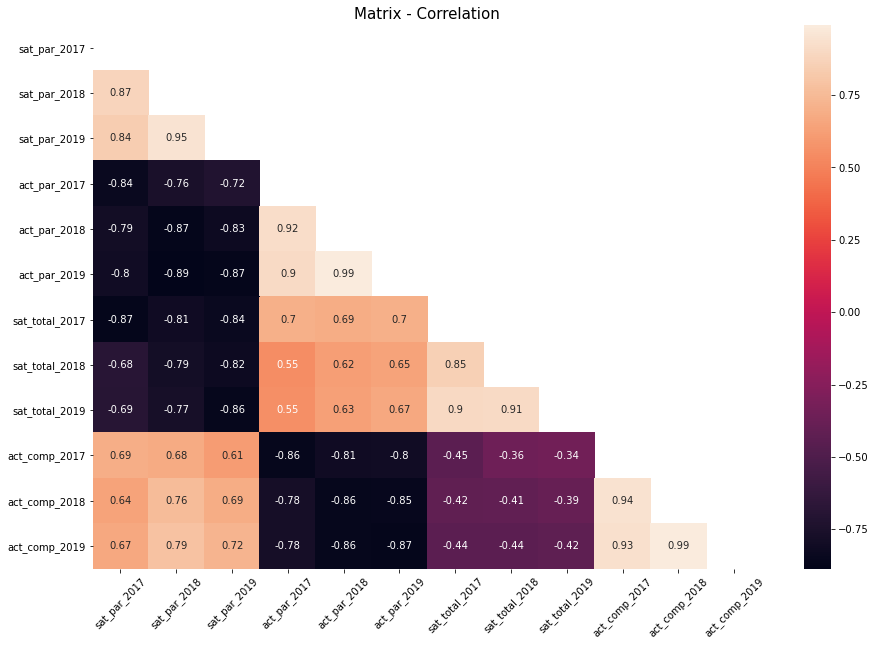

In [239]:
#generated matrix to display correlation(s)
matrix(df_limited, "Matrix - Correlation", (15,10))

**Findings**

There's a negative correlation between SAT and ACT participation across all three years (-85% in 2017, -87% in 2018, -87% in 2019) meaning states that have high ACT participation tend to have lower SAT participation, and the same vice versa.

#### Use Seaborn's pairplot for relevant columns

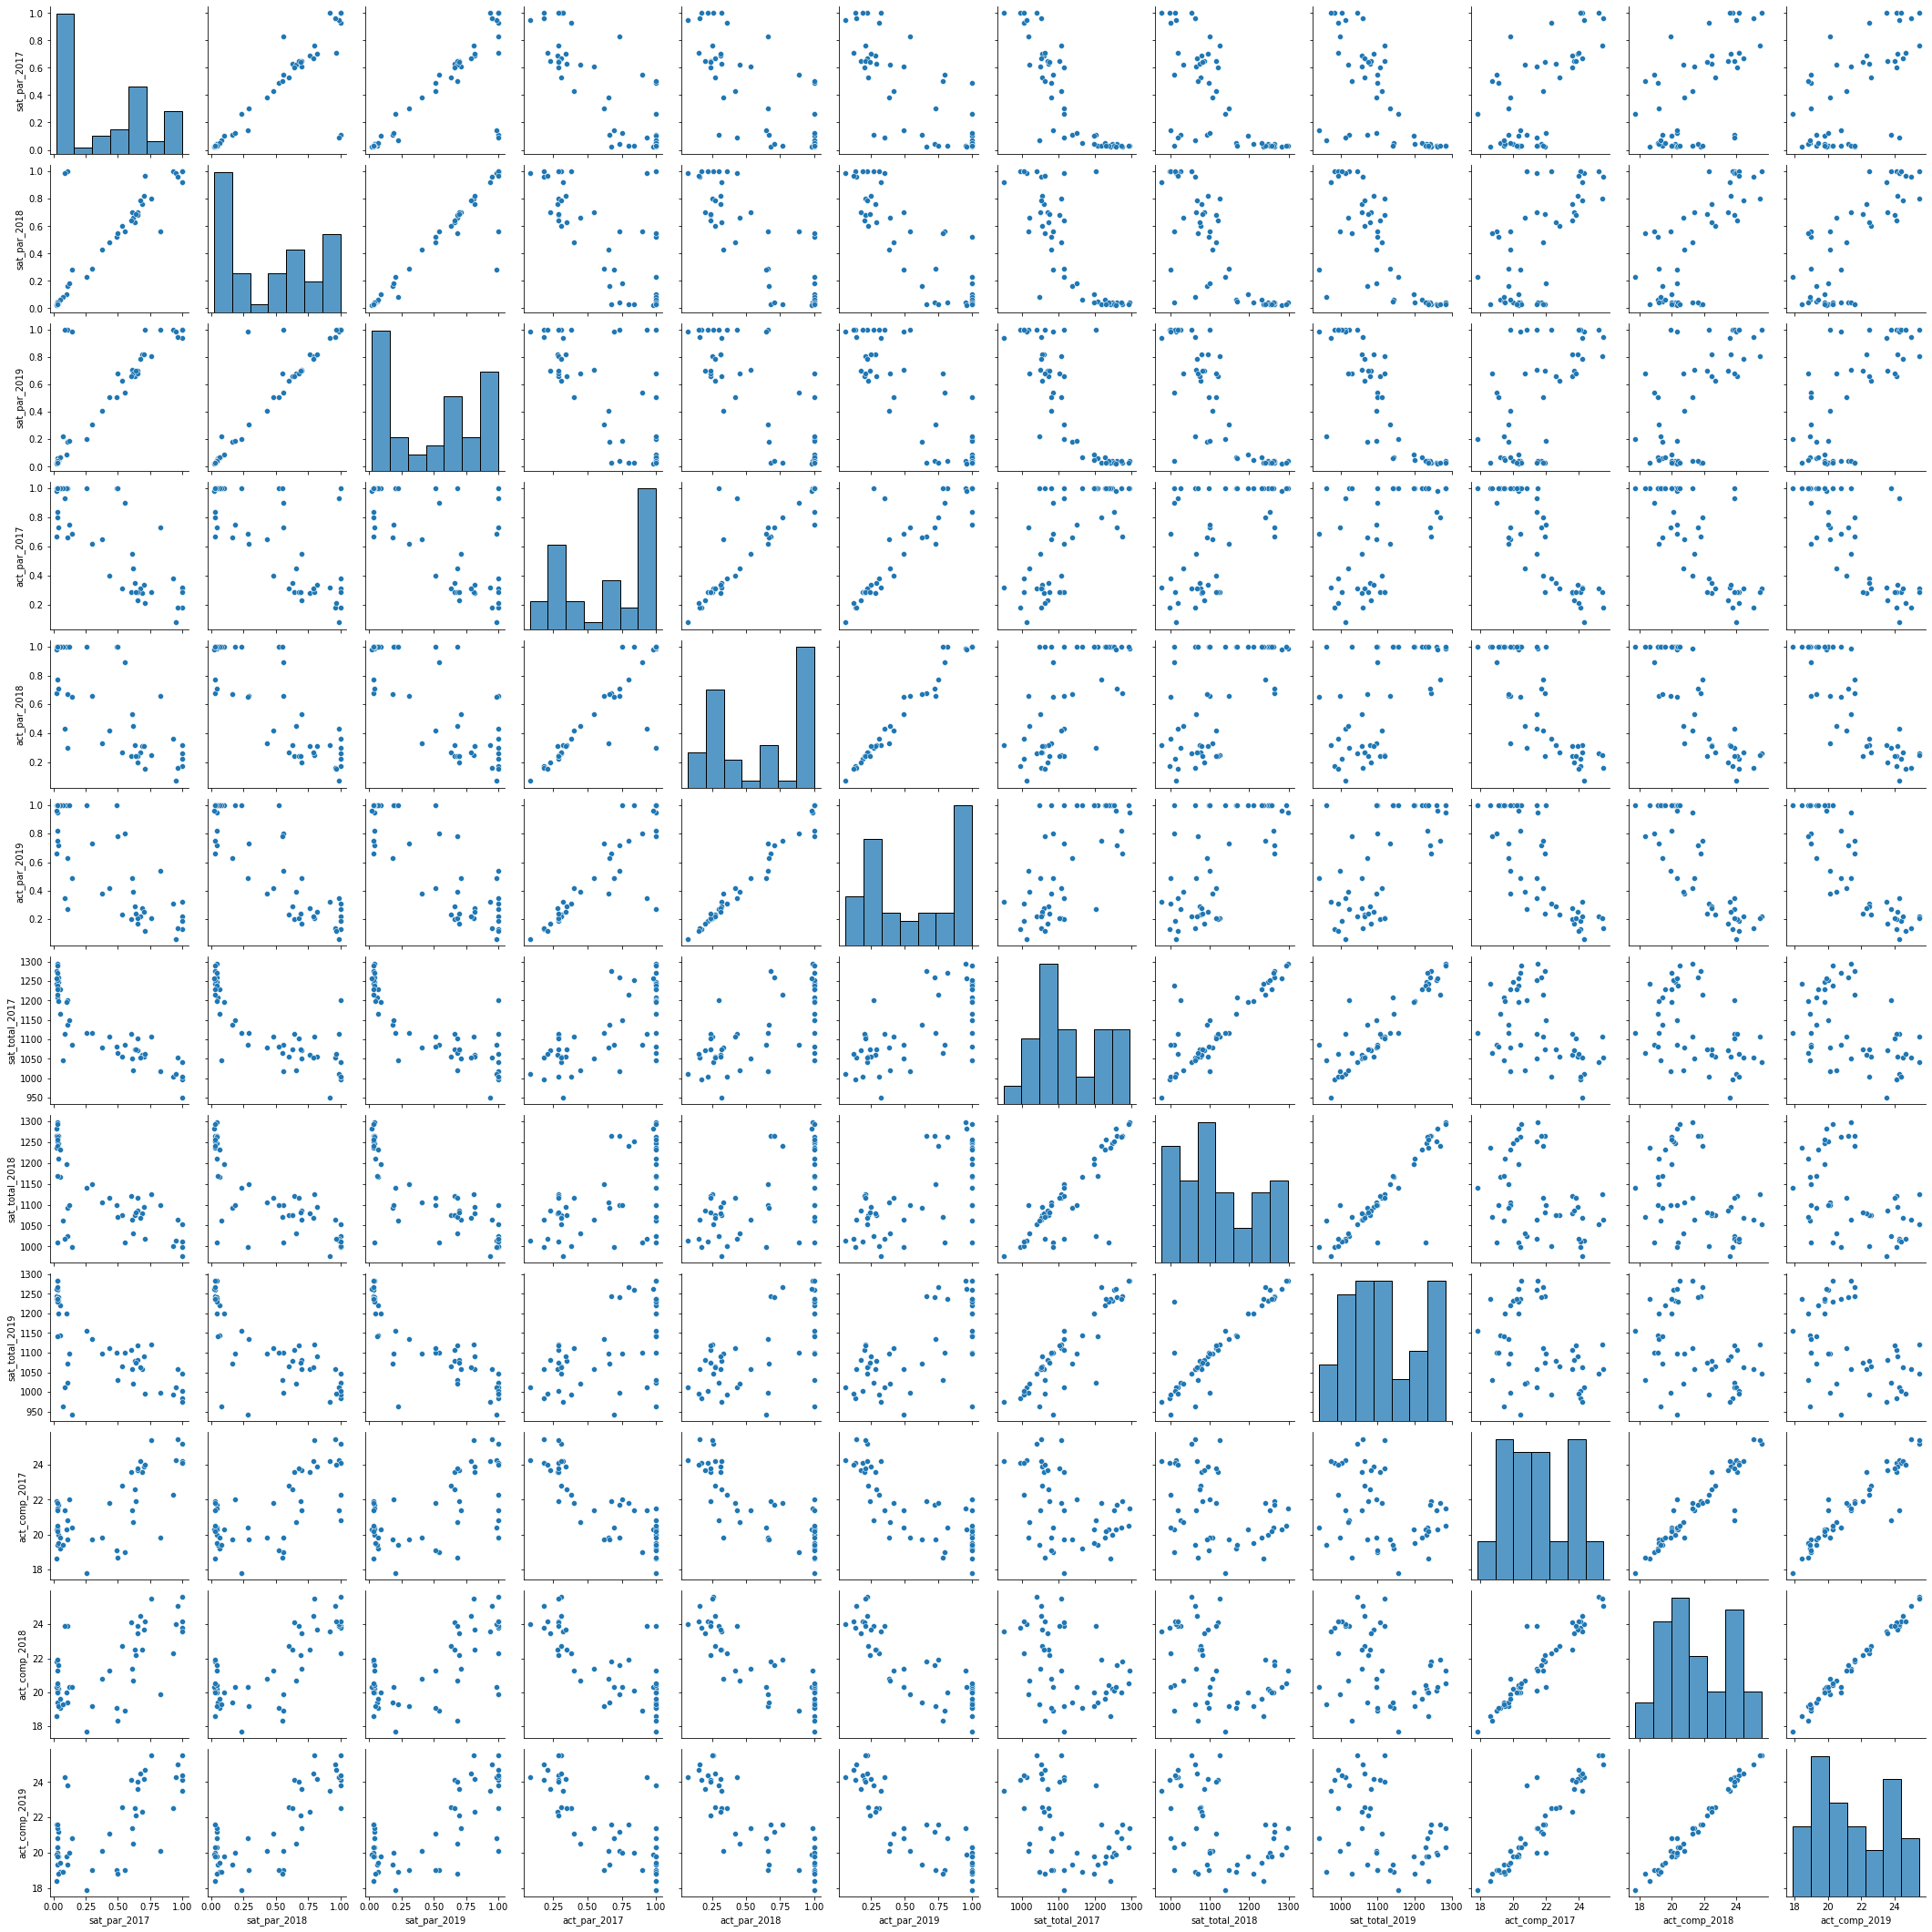

In [240]:
pairplot = sns.pairplot(df_limited)
pairplot

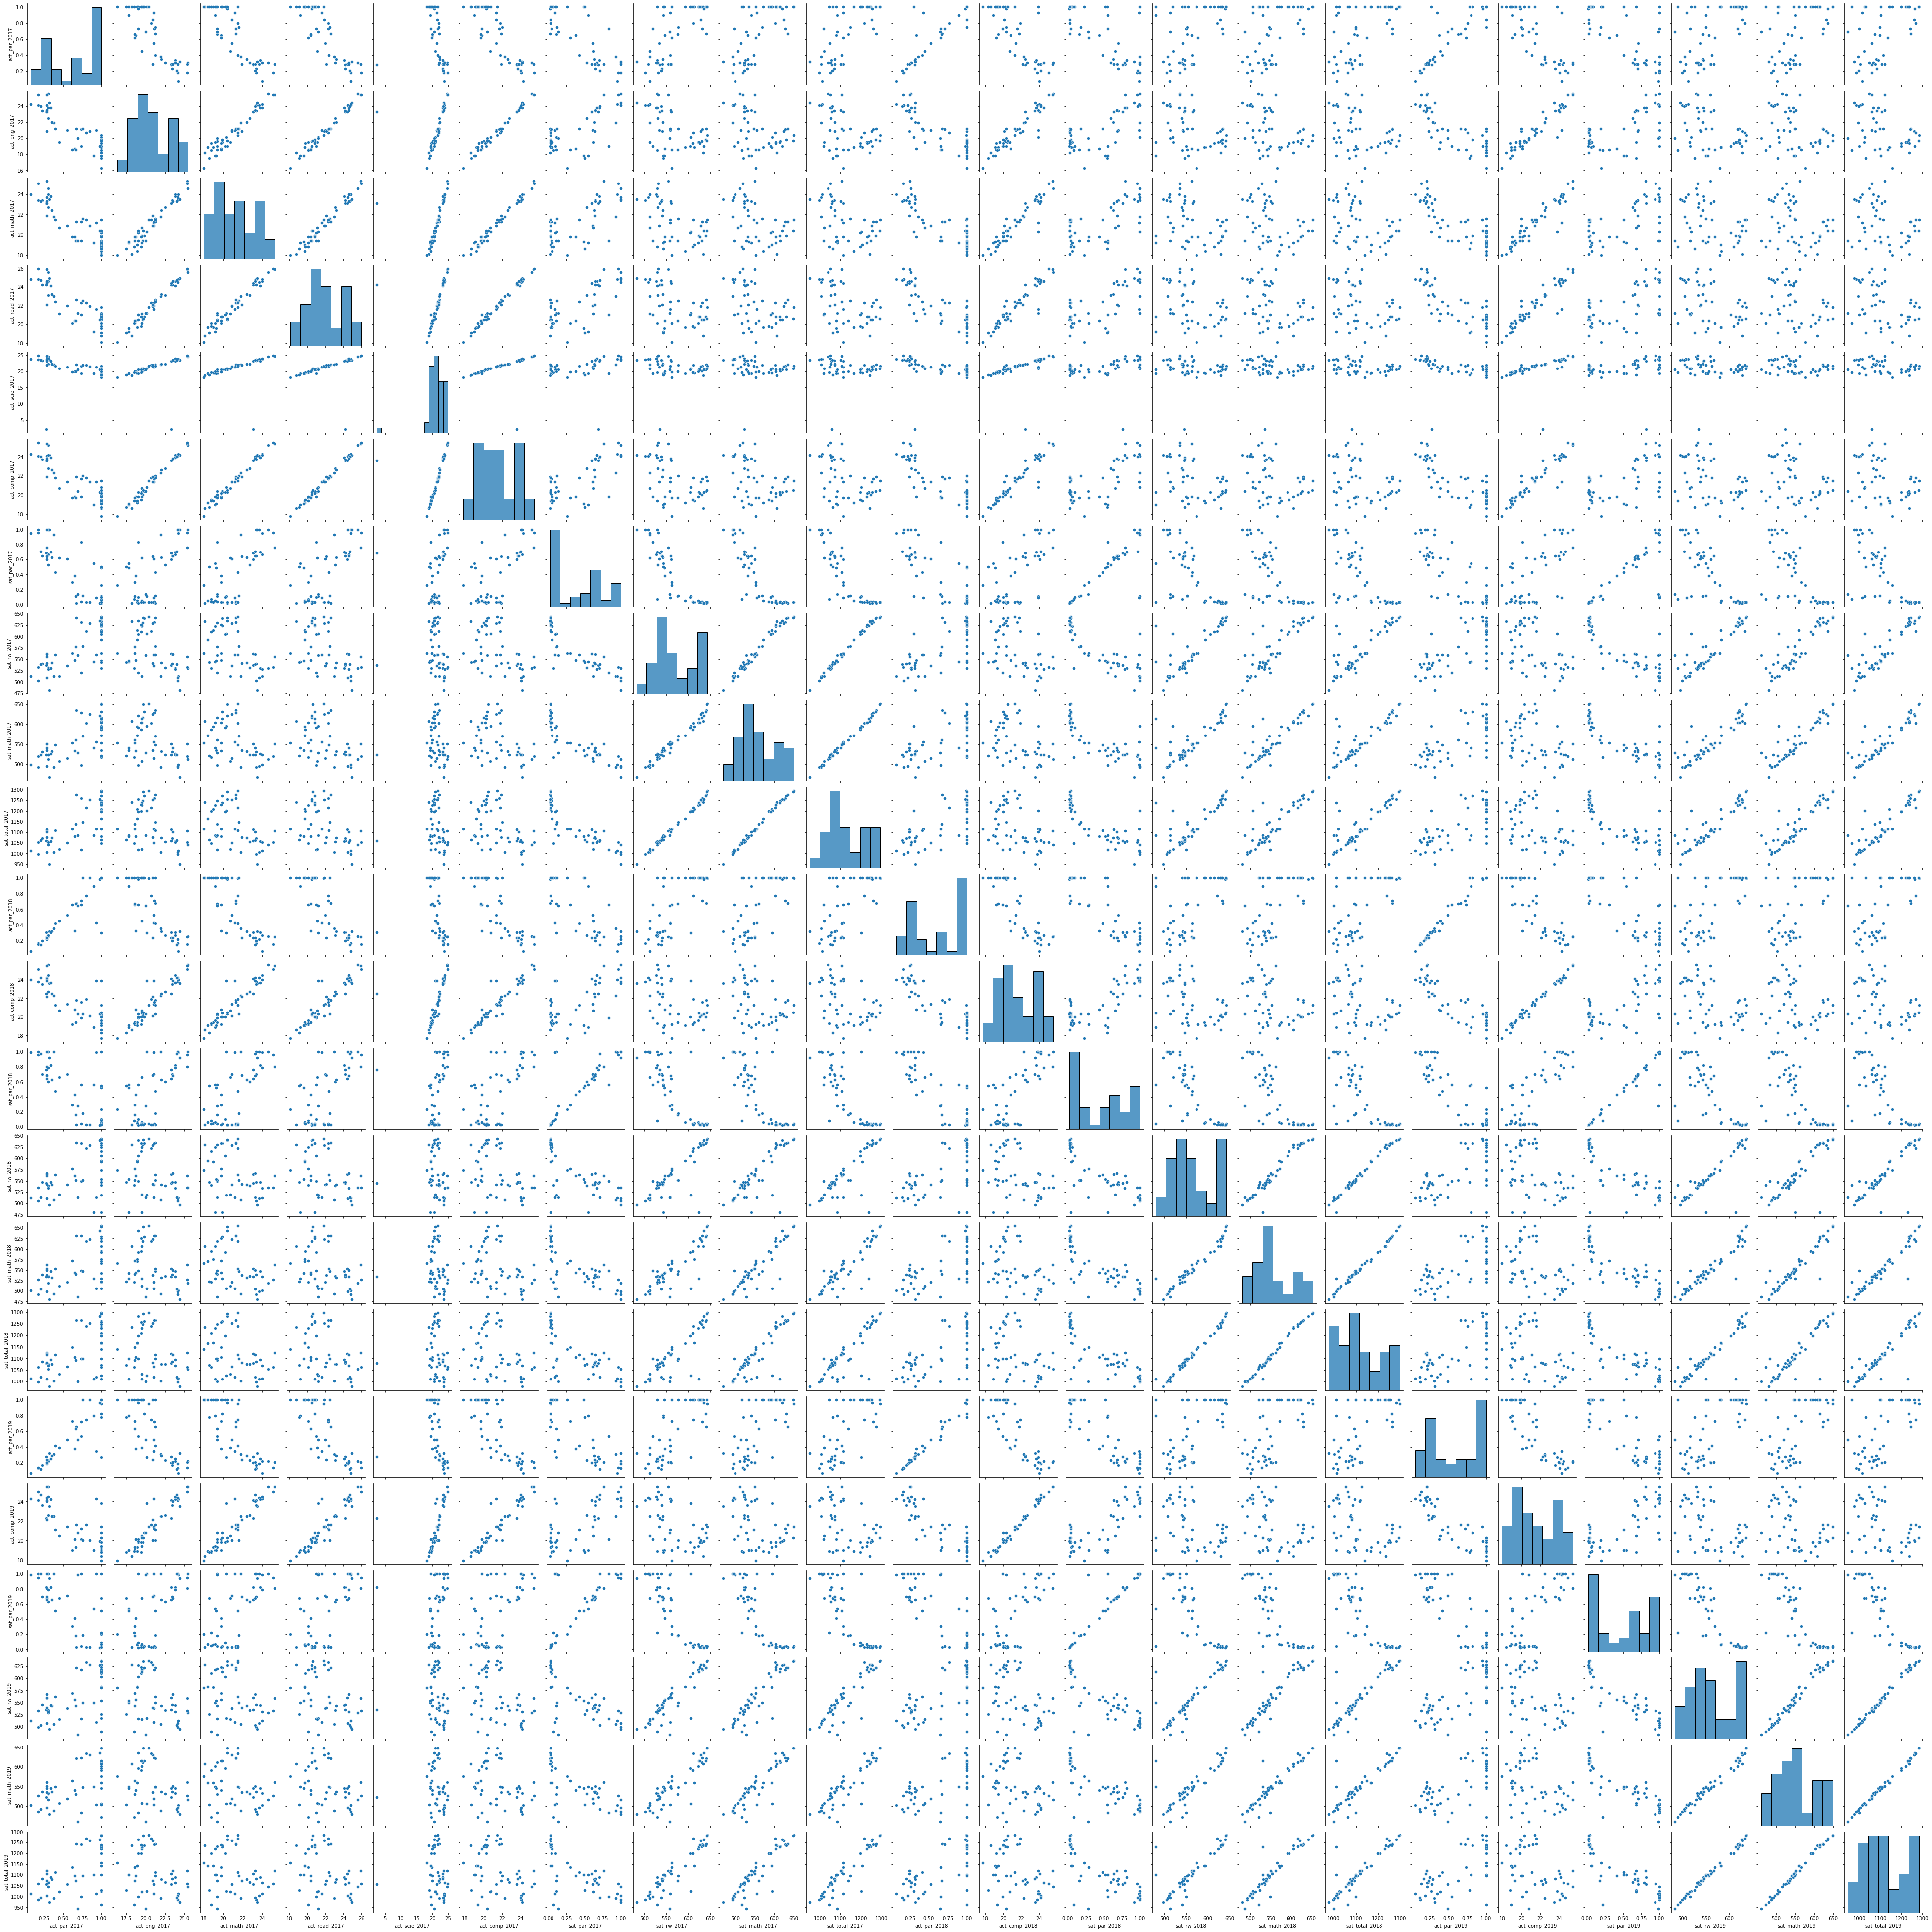

In [241]:
pairplot = sns.pairplot(df_all)
pairplot

**Findings**

Relevant columns include:

- ACT & SAT scores
- ACT & SAT participation
- SAT Math Scores

#### Plot and interpret histograms for important columns

In [242]:
#Helpful Web Source to create function: https://matplotlib.org/gallery.html#

def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,
                      list_of_ylabels, figsize, bin_cnt, xlim, ylim):
    #ensure enough rows are available
    nrows = int(np.ceil(len(list_of_columns)/2))
    
    #determine figure size
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = figsize)
    
    #the ravel function turns the matrix into a vector
    ax = ax.ravel()
    
    #provide index value to get into the list of columns
    for i, column in enumerate(list_of_columns):
        
        #set labels, titles, ect.
        ax[i].hist(dataframe[column], bins = bin_cnt)
        ax[i].tick_params(axis="x", labelsize=14)
        ax[i].tick_params(axis="y", labelsize=14)
        ax[i].set_title(list_of_titles[i], fontsize = 20)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 16)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize = 16)
        ax[i].set_xlim(xlim[i])
        ax[i].set_ylim(ylim[i])
        ax[i].grid(False)

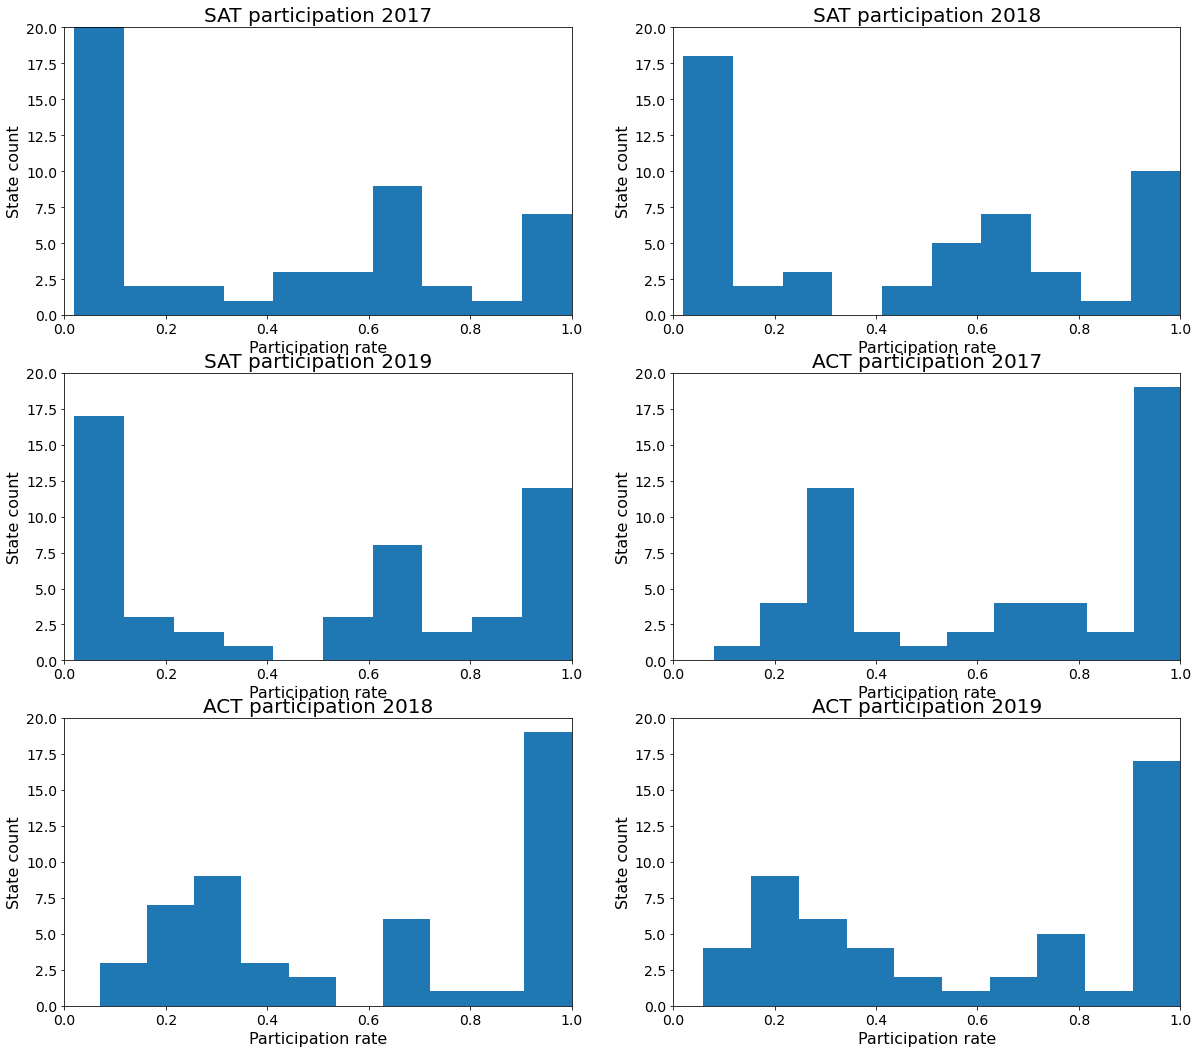

In [243]:
#participation - all years, sat & act
subplot_histograms(df_all, 
                  ["sat_par_2017","sat_par_2018","sat_par_2019","act_par_2017","act_par_2018","act_par_2019"], 
                  ["SAT participation 2017","SAT participation 2018","SAT participation 2019","ACT participation 2017","ACT participation 2018","ACT participation 2019"],
                  ["Participation rate", "Participation rate", "Participation rate", "Participation rate", "Participation rate", "Participation rate"],
                  ["State count", "State count", "State count", "State count", "State count", "State count"],
                  (20,18), 
                  10,
                  [[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]],
                  [[0,20],[0,20],[0,20],[0,20],[0,20],[0,20]])

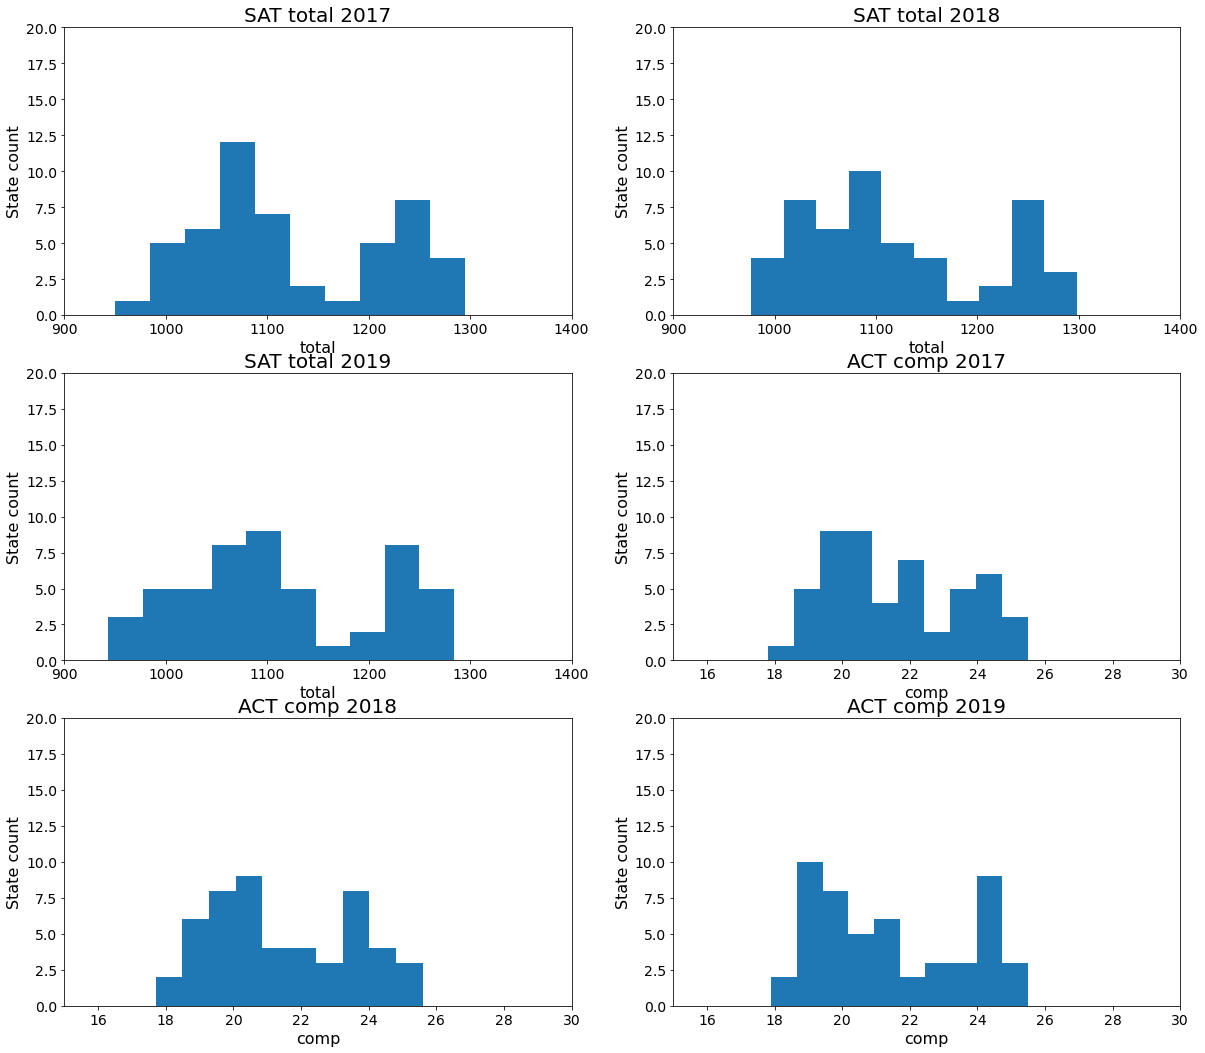

In [244]:
#scores - all years, sat & act
subplot_histograms(df_all, 
                  ["sat_total_2017","sat_total_2018","sat_total_2019","act_comp_2017","act_comp_2018","act_comp_2019"], 
                  ["SAT total 2017","SAT total 2018","SAT total 2019","ACT comp 2017","ACT comp 2018","ACT comp 2019"],
                  ["total", "total", "total", "comp", "comp", "comp"],
                  ["State count", "State count", "State count", "State count", "State count", "State count"],
                  (20,18), 
                  10,
                  [[900,1400],[900,1400],[900,1400],[15,30],[15,30],[15,30]],
                  [[0,20],[0,20],[0,20],[0,20],[0,20],[0,20]])

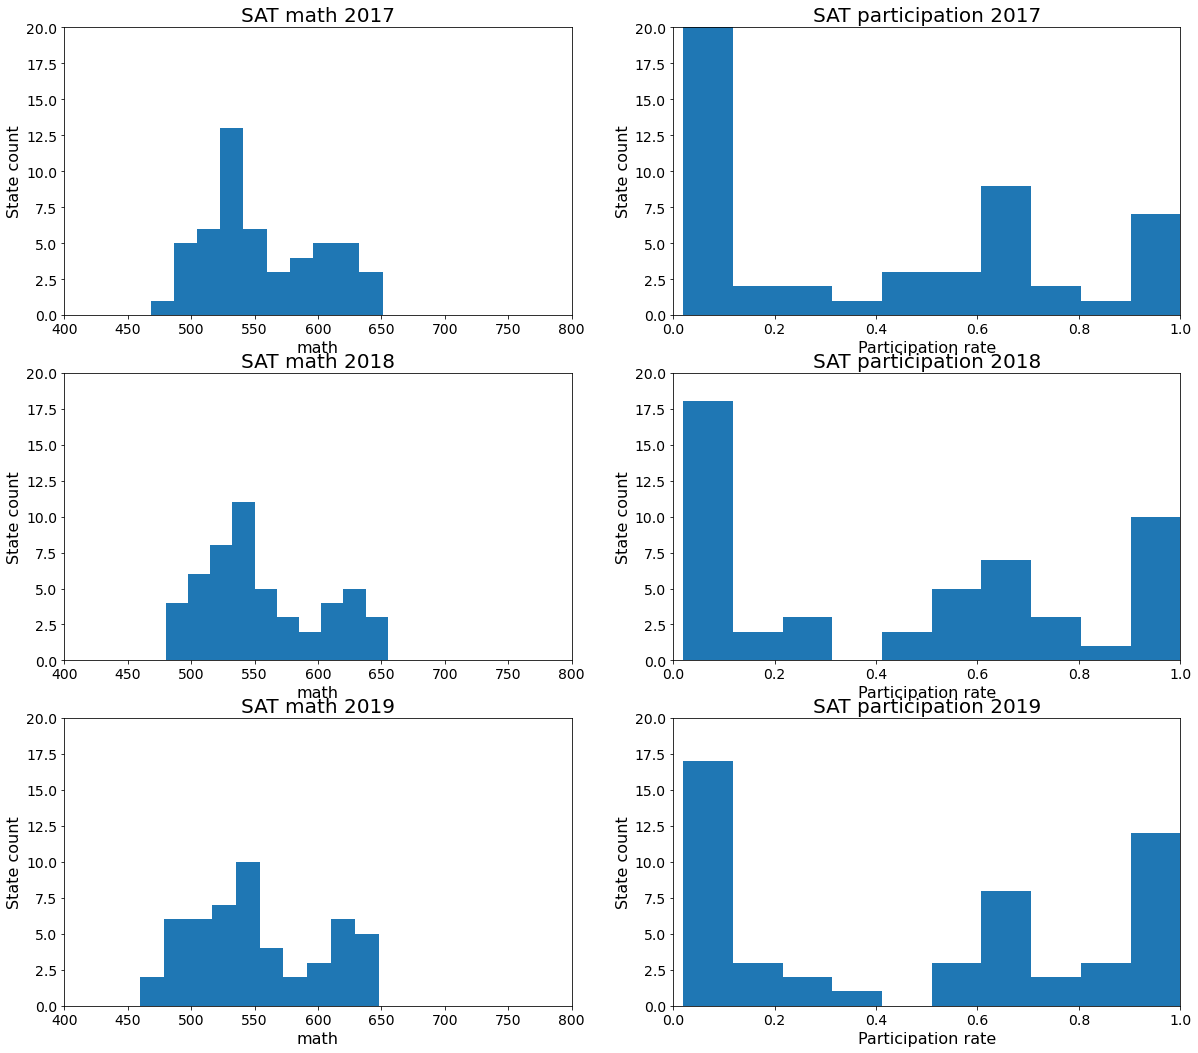

In [245]:
#math scores vs. sat par. rates
subplot_histograms(df_all, 
                  ["sat_math_2017","sat_par_2017","sat_math_2018","sat_par_2018","sat_math_2019","sat_par_2019"],
                  ["SAT math 2017","SAT participation 2017","SAT math 2018","SAT participation 2018","SAT math 2019","SAT participation 2019"],
                  ["math","Participation rate","math","Participation rate","math","Participation rate"],
                  ["State count", "State count", "State count", "State count", "State count", "State count"],
                  (20,18), 
                  10,
                  [[400,800],[0,1],[400,800],[0,1],[400,800],[0,1]],
                  [[0,20],[0,20],[0,20],[0,20],[0,20],[0,20]])

**Findings**

Across all three years for both ACT and SAT participation, the distribution is far from normal; most states either have a high or low participation rate. There are very few cases where a state had around half the students take one test or the other. The test scores are a little bit more even across the board that somewhat shows a normal distribution, but not really.

As the participation rate rises each year, the scores decrease. Looking at Math scores specifically as a use case, you can see the slight left shift in the minimum and maximum boundaries when comparing 2017, 2018, and 2019.

#### Plot and interpret scatter plots for import columns


In [246]:
#Helpful Web Source to create function: https://matplotlib.org/gallery.html# (same as above)

def create_scatter(df, x_list, y_list, title_list, xlabel_list, ylabel_list, figsize, xlim, ylim):
    #identify count of rows
    nrows = int(np.ceil(len(x_list)/2))
    
    #identify count of columns
    if len(x_list) == 1:
        ncols = 1
    else:
        ncols = 2
    
    #create the objects in the plot plus figure
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
    if ncols == 1:
        ax.scatter(x=df[x_list[0]],y=df[y_list[0]], s = 50)
        ax.set_title(title_list[0], fontsize = 20)
        ax.set_ylabel(ylabel_list[0], fontsize = 16)
        ax.set_xlabel(xlabel_list[0], fontsize = 16)
        ax.tick_params(axis="x", labelsize=14)
        ax.tick_params(axis="y", labelsize=14)
        ax.set_xlim(xlim[0])
        ax.set_ylim(ylim[0])
    else:    
        
        #loop through the x and y lists
        for i, x in enumerate(x_list):
            ax[i].scatter(x=df[x],y=df[y_list[i]], s = 50)
            ax[i].set_title(title_list[i], fontsize = 20)
            ax[i].set_ylabel(ylabel_list[i], fontsize = 16)
            ax[i].set_xlabel(xlabel_list[i], fontsize = 16)
            ax[i].tick_params(axis="x", labelsize=14)
            ax[i].tick_params(axis="y", labelsize=14)
            ax[i].set_xlim(xlim[i])
            ax[i].set_ylim(ylim[i])

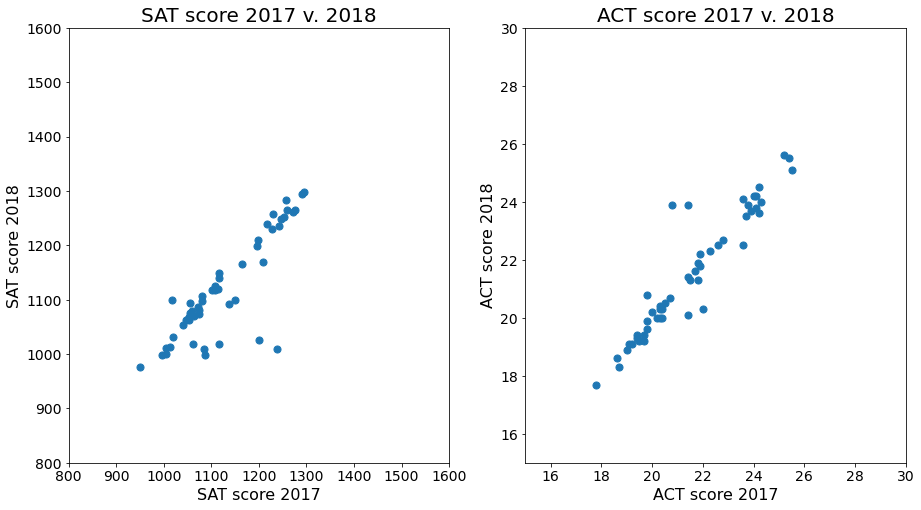

In [247]:
#test scores 2017 v. 2018 - both tests
create_scatter(df_all, 
               ["sat_total_2017", "act_comp_2017"], 
               ["sat_total_2018", "act_comp_2018"], 
               ["SAT score 2017 v. 2018", "ACT score 2017 v. 2018"], 
               ["SAT score 2017", "ACT score 2017"],
               ["SAT score 2018", "ACT score 2018"], 
               (15,8),
               [[800,1600],[15,30]],
               [[800,1600],[15,30]])

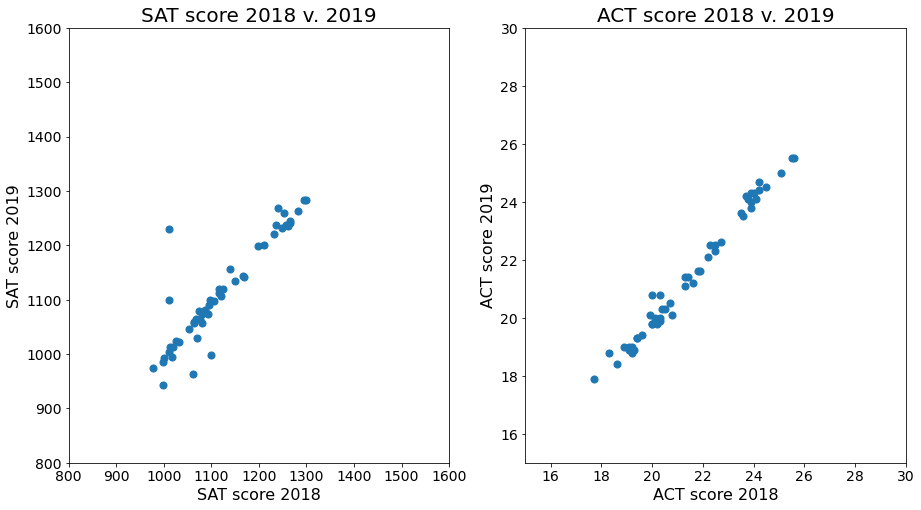

In [248]:
#test scores 2018 v. 2019 - both tests
create_scatter(df_all, 
               ["sat_total_2018", "act_comp_2018"], 
               ["sat_total_2019", "act_comp_2019"], 
               ["SAT score 2018 v. 2019", "ACT score 2018 v. 2019"], 
               ["SAT score 2018", "ACT score 2018"],
               ["SAT score 2019", "ACT score 2019"], 
               (15,8),
               [[800,1600],[15,30]],
               [[800,1600],[15,30]])

**Findings**

As mentioned earlier, as the participation rate increase the average scores decrease.

What I found a bit contradictive here is the minimal negative correlation between ACT and SAT scores indicating higher SAT scores are affiliated with lower ACT scores. As participation rates rise for the SAT and fall for the ACT YoY, we'd expect an ACT scores to rise, correct? Nothing to take away from the above scatter plots.

#### Plot and interpret boxplots for important columns


In [249]:
#Helpful Web Source to create function: https://stackoverflow.com/questions/62901783/how-to-plot-boxplots-of-multiple-columns-with-different-ranges

def two_boxplots(df_list, title_list, xlabel_list, ylabel_list, xticklabels_list, figsize):
    
    #create tow box plots
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = figsize)
    
    #for both frames create boxplot
    for i in range(2):
        ax[i] = sns.boxplot(x="variable", y="value", data=pd.melt(df_list[i]), ax = ax[i])
        ax[i].set_title(title_list[i], fontsize = 20)
        ax[i].set_xlabel(xlabel_list[i], fontsize = 16)
        ax[i].set_ylabel(ylabel_list[i], fontsize = 16)
        ax[i].tick_params(axis="x", labelsize = 14)
        ax[i].tick_params(axis="y", labelsize = 14)
        ax[i].set_xticklabels(xticklabels_list)

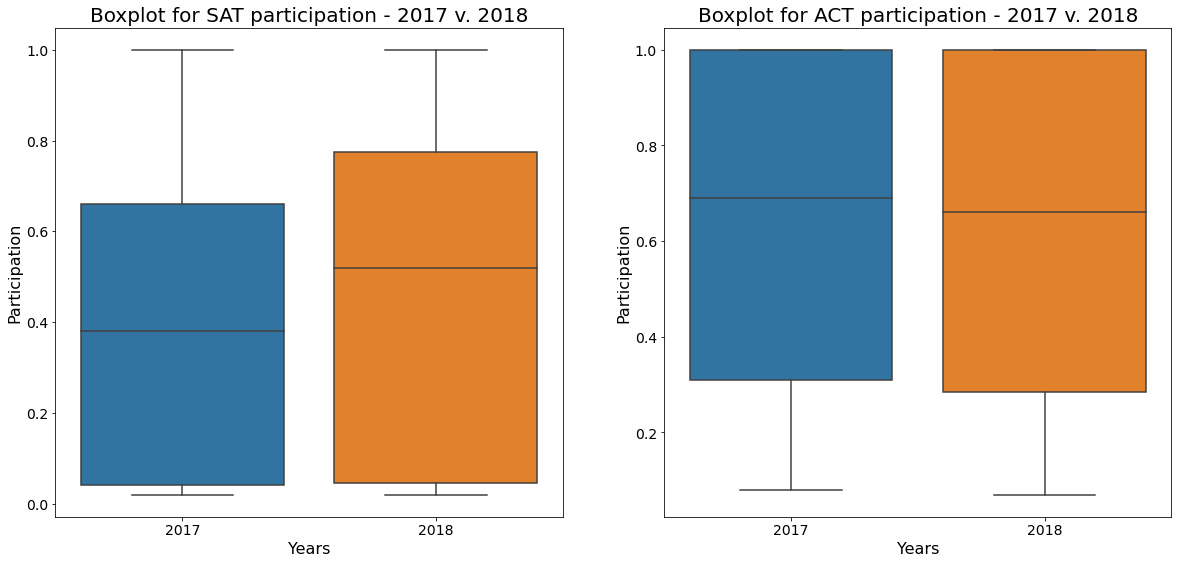

In [250]:
#participation 2017 v. 2018 - both tests
two_boxplots([df_all[["sat_par_2017","sat_par_2018"]],df_all[["act_par_2017","act_par_2018"]]],
             ["Boxplot for SAT participation - 2017 v. 2018", "Boxplot for ACT participation - 2017 v. 2018"],
             ["Years", "Years"], 
             ["Participation","Participation"], 
             ["2017","2018"], 
             (20,9))

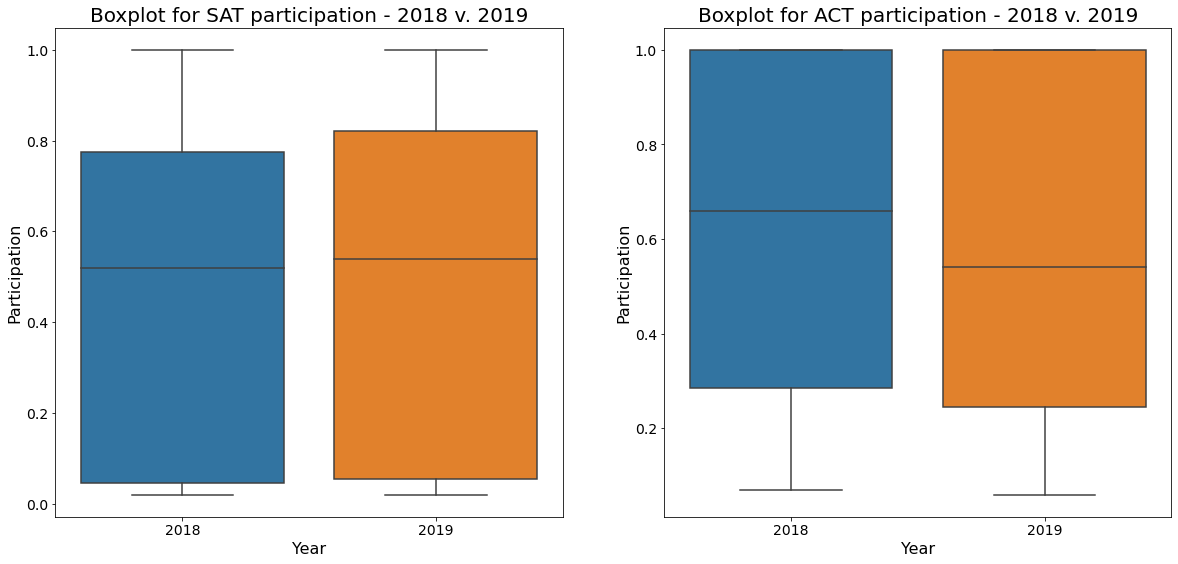

In [251]:
#participation 2018 v. 2019 - both tests
two_boxplots([df_all[["sat_par_2018","sat_par_2019"]],df_all[["act_par_2018","act_par_2019"]]],
             ["Boxplot for SAT participation - 2018 v. 2019", "Boxplot for ACT participation - 2018 v. 2019"],
             ["Year", "Year"], 
             ["Participation","Participation"], 
             ["2018","2019"], 
             (20,9))

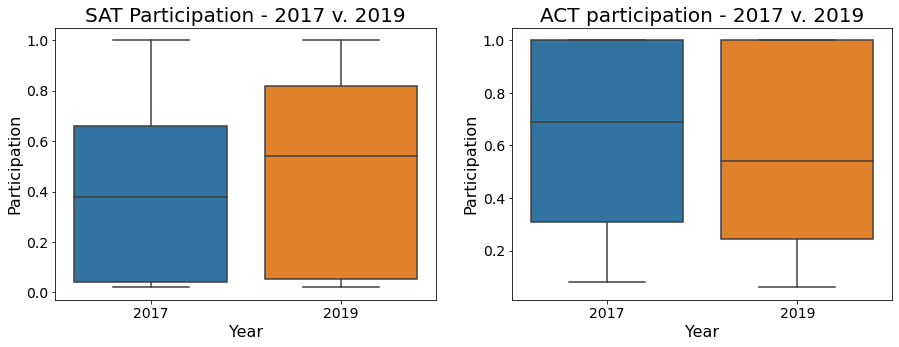

In [252]:
#participation 2017 v. 2019 - both tests
two_boxplots([df_all[["sat_par_2017","sat_par_2019"]],df_all[["act_par_2017","act_par_2019"]]],
             ["SAT Participation - 2017 v. 2019", "ACT participation - 2017 v. 2019"],
             ["Year", "Year"], 
             ["Participation","Participation"], 
             ["2017","2019"], 
             (15,5))

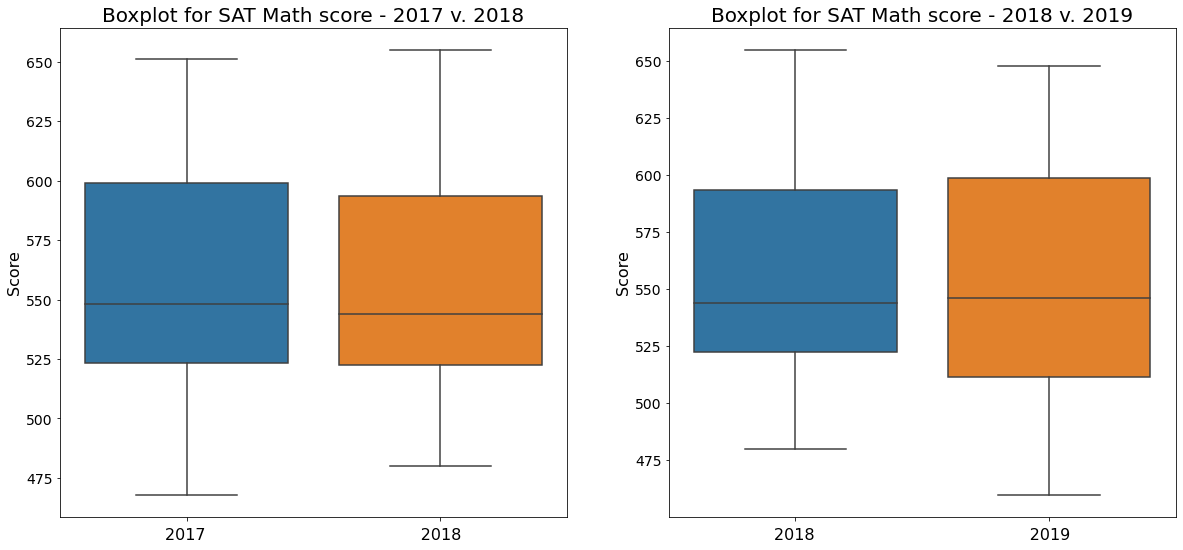

In [253]:
#math scores SAT - 2017 v. 2018, 2018 v. 2019
two_boxplots([df_all[["sat_math_2017","sat_math_2018"]], df_all[["sat_math_2018","sat_math_2019"]]],
             ["Boxplot for SAT Math score - 2017 v. 2018", "Boxplot for SAT Math score - 2018 v. 2019"],
             ["2017                                          2018","2018                                          2019"], 
             ["Score","Score"], 
             ["",""],
             (20,9))

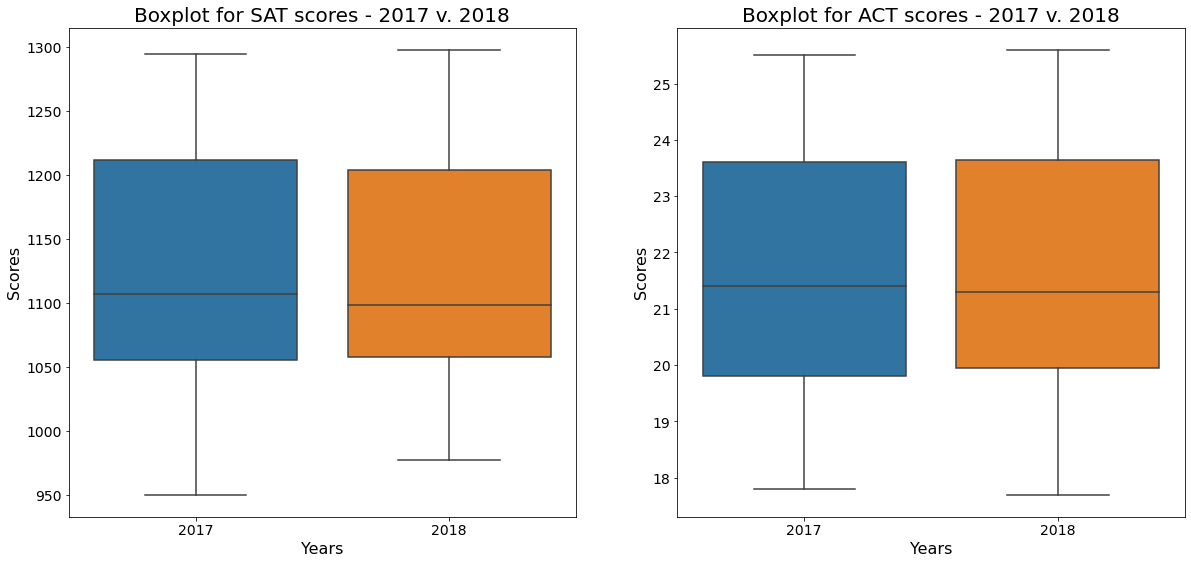

In [254]:
#test scores 2017 v. 2018 - both tests
two_boxplots([df_all[["sat_total_2017","sat_total_2018"]],df_all[["act_comp_2017","act_comp_2018"]]],
             ["Boxplot for SAT scores - 2017 v. 2018", "Boxplot for ACT scores - 2017 v. 2018"],
             ["Years", "Years"], 
             ["Scores","Scores"], 
             ["2017","2018"], 
             (20,9))

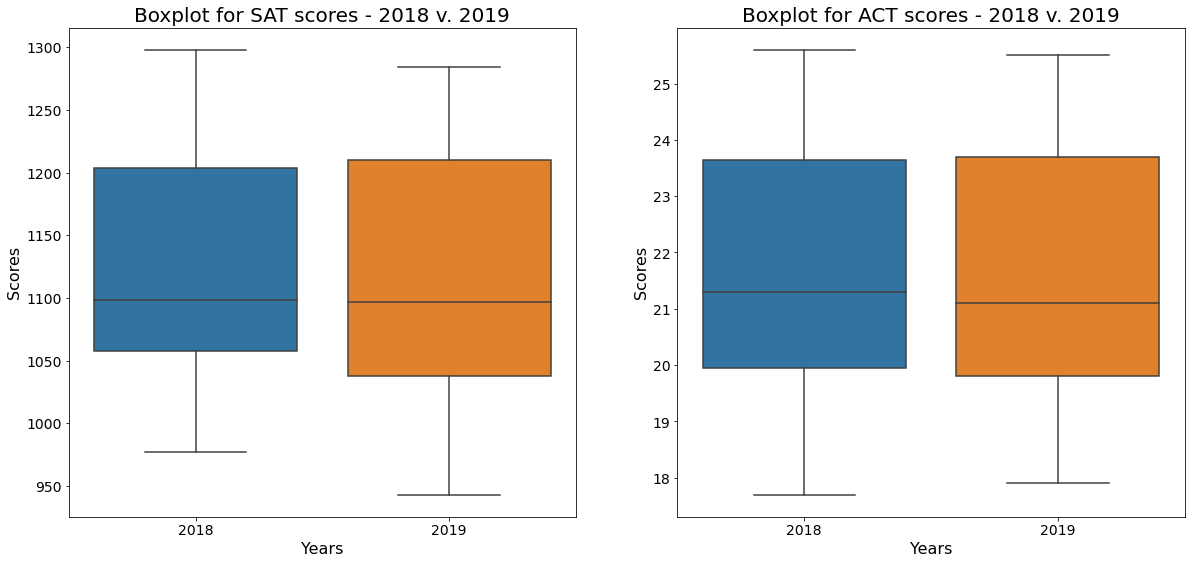

In [255]:
#test scores 2018 v. 2019 - both tests
two_boxplots([df_all[["sat_total_2018","sat_total_2019"]],df_all[["act_comp_2018","act_comp_2019"]]],
             ["Boxplot for SAT scores - 2018 v. 2019", "Boxplot for ACT scores - 2018 v. 2019"],
             ["Years", "Years"], 
             ["Scores","Scores"], 
             ["2018","2019"], 
             (20,9))

**Findings**

The box plots above show a few things indicating the lower SAT scores:
1. 2017 v 2018 - the IQ (inter-quartile) range is relatively the same but a bit lower for the 75th percentile score for 2018
2. 2018 V 2019 - the IQ range is much wider. Although the 75th percentile score is slightly higher for 2019, in 2018 you see a much lower test score for 25th percentile in the range

The box plots do not show the expected change in increased ACT scores caused by lower participation rates. At a high level, this is reflected in the mean test scores for the ACT as well:

|Year|National Participation|Average Score
|---|---|---|
|2017|65%|21.51|
|2018|61%|21.49|
|2019|58%|21.46|

**Missing Data**

A key piece of missing data is the actual count of students in each state. Not having this information makes it difficult to draw any conclusions for the nation as a whole regarding SAT and ACT participation/scores. E.g., if we calculate the average national participation rate, Hawaii will have the same impact as Illinois in this calculation given this data. But if Illinois has 20 times (hypothetically) the number of students it should have a much larger impact on this calculation in reality.

**Additional Visualizations**

In [258]:
#create subset data frames for bar graphs below
df_act_2017 = df_all[df_all['act_par_2017'] > df_all['sat_par_2017']]
df_sat_2017 = df_all[df_all['act_par_2017'] < df_all['sat_par_2017']]
df_act_2019 = df_all[df_all['act_par_2019'] > df_all['sat_par_2019']]
df_sat_2019 = df_all[df_all['act_par_2019'] < df_all['sat_par_2019']]

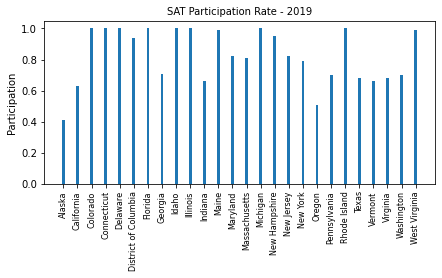

In [261]:
#bar graph including states that had a higher SAT participation vs. ACT participation in 2019
#displays the SAT participation rate for these states
displays the SAT part 
plt.figure(figsize=(7,3))
plt.bar(df_sat_2019['state'], df_sat_2019['sat_par_2019'], width=.2)
plt.title('SAT Participation Rate - 2019', fontsize=10)
plt.tick_params(axis="x", rotation = 90, labelsize = 8)
plt.ylabel('Participation', fontsize=10)
plt.show()

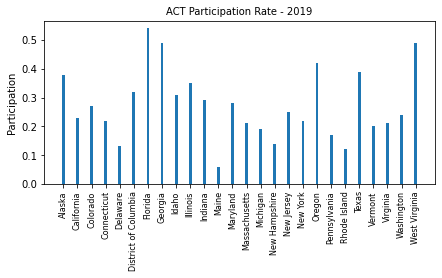

In [262]:
#bar graph including states that had a higher SAT participation vs. ACT participation in 2019
#displays the ACT participation rate for these states
plt.figure(figsize=(7,3))
plt.bar(df_sat_2019['state'], df_sat_2019['act_par_2019'], width=.2)
plt.title('ACT Participation Rate - 2019', fontsize=10)
plt.tick_params(axis="x", rotation = 90, labelsize = 8)
plt.ylabel('Participation', fontsize=10)
plt.show()

## Outside Research

**Findings**

The State of Illinois has recently decided to require all students to take the SAT instead of the ACT. The high-level reasoning the board selected to do this was because "the SAT was better aligned with standards for what students should know in Illinois."
https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html

In 2016 when the Illinois Board of Education made this decision, the winning bid was worth a total of 59.7 million dollars rewarded to the SAT. While the ACT's bid price of 54 million dollars was declined, it was 3 million dollars less than the SAT's.
https://chicago.chalkbeat.org/2018/7/27/21105418/illinois-has-embraced-the-sat-and-the-act-is-mad-about-it

There's been steady increase in the percentage of students in Illinois who enroll in a two-year or four-year college within 12 to 16 months upon graduating high school.
**This web data has been imported as 'ILLINOIS_EDUCATIONALENVIRONMENT_2020_1.csv' and displayed in the visual below this markdown cell**
https://www.illinoisreportcard.com/state.aspx?source=trends&source2=postsecondaryenrollment&Stateid=IL

**Additional Findings (regarding the nation as a whole, not Illinois specifically)**

Ivy League schools have accepted almost 10 - 40% more applicants who submitted their SAT versus ACT. Although these schools accept both it should be noted that they continuously admit more students who took the SAT even though these schools claim one test isn't preferred over the other. Since Ivy League schools are considered the most prestigious in the nation and have the smartest students, can something be said regarding which test does a better job at determining an indivdual's IQ?
https://blog.prepscholar.com/what-do-ivy-league-schools-think-of-the-act

More and more colleges are not requiring students to submit the ACT/SAT to apply; every 10 days another college is added to that list.
https://www.pbs.org/newshour/education/record-number-of-colleges-stop-requiring-the-sat-and-act-amid-questions-of-fairness

A couple reasons why one may believe the SAT is better than the ACT:
-The SAT is taken at a slower pace
-The SAT organizes its reading questions much better in comparison to the ACT
-The SAT is heavy on algebra, light on geometry and trig; it covers less concepts in comparison to the ACT like logarithms, matrices, and graphs of trigonometric functions
https://blog.prepscholar.com/why-take-the-sat

In 2019, 2.2 million students took the SAT while 1.8 million took the ACT.
https://www.usnews.com/education/best-colleges/articles/act-vs-sat-how-to-decide-which-test-to-take

In [263]:
#pulled an excel file from a web page reflecting Illinois high school student graduation rates, college enrollment, ect.
file_path = '../data/ILLINOIS_EDUCATIONALENVIRONMENT_2020_1.csv'
illinois_sat_data = pd.read_csv(file_path)

In [264]:
illinois_sat_data.head()

,Year,English Learners (%),With IEPs (%),Low Income (%),Homeless (%),Parental Involvement (%),Attendance (%),Mobility (%),Chronic Truants (%),High School Dropout Rate (%),...,EL Long Term Students (%),Total Enrollment (N),Post Secondary Remediation Communication (%),Post Secondary Remediation Reading (%),Post Secondary Remediation Math (%),Graduates (N),Attending Illinois Community College (N),Attending Illinois Community College (%),Enrolled in Remedial Courses (N),Enrolled in Remedial Courses (%)
0,2019,12.1,15.5,48.8,2.0,-,94.0,7.1,13.4,4.2,...,"28,216",1984519,20.5 (Graduating Class 2017),12.6 (Graduating Class 2017),34.7 (Graduating Class 2017),137286 (Graduating Class 2017),39354 (Graduating Class 2017),29 (Graduating Class 2017),17405 (Graduating Class 2017),44.2 (Graduating Class 2017)
1,2018,11.7,14.5,49.4,2.0,95.1,93.9,6.9,11.2,2.1,...,"24,957",2001548,20.5 (Graduating Class 2016),14.2 (Graduating Class 2016),36.6 (Graduating Class 2016),137548 (Graduating Class 2016),42703 (Graduating Class 2016),31.3 (Graduating Class 2016),19506 (Graduating Class 2016),45.7 (Graduating Class 2016)
2,2017,10.7,13.9,50.2,2.1,94.9,94.0,6.9,10.8,2.1,...,-,2028162,20.8 (Graduating Class 2015),14.5 (Graduating Class 2015),38.2 (Graduating Class 2015),128527 (Graduating Class 2015),41464 (Graduating Class 2015),32.3 (Graduating Class 2015),19388 (Graduating Class 2015),46.8 (Graduating Class 2015)
3,2016,10.5,14.3,49.9,2.2,95.3,94.4,12.2,9.8,2.0,...,-,2041779,21.8 (Graduating Class 2014),17 (Graduating Class 2014),41.1 (Graduating Class 2014),132661 (Graduating Class 2014),42256 (Graduating Class 2014),31.9 (Graduating Class 2014),20894 (Graduating Class 2014),49.4 (Graduating Class 2014)


In [265]:
df = pd.DataFrame(illinois_sat_data,columns=['Year','12MonthEnrollment','16MonthEnrollment'])

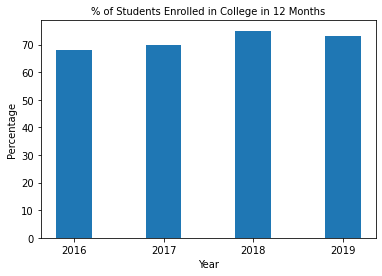

In [266]:
#bar graph for 2016 - 2020 - perc. of students who went to college within 12 months of graduating
plt.bar(df['Year'], df['12MonthEnrollment'], width=0.4, tick_label=df['Year'])
plt.title('% of Students Enrolled in College in 12 Months', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.show()

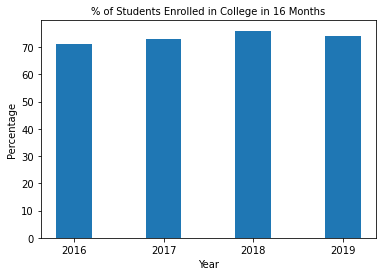

In [267]:
#bar graph for 2016 - 2020 - perc. of students who went to college within 16 months of graduating
plt.bar(df['Year'], df['16MonthEnrollment'], width=0.4, tick_label=df['Year'])
plt.title('% of Students Enrolled in College in 16 Months', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.show()

## Conclusion

A key finding that stood out was the number of states that had 100% participation rates for either the SAT or ACT. The reasoning that every single student participates in at least one of these tests is due to the fact that these states force all students to take it. For example, we see Illinois participation rates have increased from 9% to 100% after the state's decision to drop the ACT and enforce the SAT; in 2016 a 59.7 million-dollar deal was made with the College Board.

Comparing 2019 versus 2017, 39 total states have shown a decrease in ACT participation by at least -1%. On the contrary, not a single state has had a decrease in their SAT participation rate by more than -1% (District of Columbia and Nevada are the highest at -.6%). Across the nation on average there's been a ~10% increase in SAT participation and a ~7% decrease in ACT participation since 2017. It's safe to say the SAT is gaining popularity in recent years. But there's still more states that have signed contracts with the ACT. Looking at the most recent year (2019) there are 15 states with 100% participation for ACT but only 8 states with 100% participation for the SAT.

In order to increase SAT participation rates, I recommend the College Board focuses on closing contracts with a given state's Education Board guaranteeing 100% participation by students. The states targeted should include either 1) states that have a signed contract currently with the ACT or 2) states that don't have a signed contract with either test but have high ACT participation rates and low SAT participation rates.

Supporting evidence includes a use case, specifically Illinois. There's been an increase in the number of students who attend a two-year or four-year college by at least ~1-2% on average, year over year. Although there can be multiple other factors involved, it can still be said there's a ~5% increase in the number of students that have gone to college since 2016, which is the same year Illinois switched from the ACT to SAT.

The negative correlation between SAT and ACT participation indicates that it is most likely a given state will continue to have low SAT participation rates if they have a signed contract with the ACT (100% participation). An obvious potential reason for this is if a student is provided one of the tests to take for free, they're less obligated to take the other one in which they would have to pay for. It is encouraged that students take both tests if they can, but if a student had to take one versus the other it is more likely they'll take the test that 1) they don't need to pay for and 2) is mandatory.